Name : Pulkit K Golay

Registeration Number : 20BCE11063

Task:

image.png

Data Augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
train_gen = ImageDataGenerator(
    rescale = (1./255),
    horizontal_flip = True,
    shear_range = 0.2
)

test_gen = ImageDataGenerator(
    rescale = (1./255)
)

In [3]:
train = train_gen.flow_from_directory(
    '/kaggle/input/bird-species-classification/train_data/train_data',
    target_size = (200, 200),
    class_mode = 'categorical',
    batch_size = 15
)

test = test_gen.flow_from_directory(
    '/kaggle/input/bird-species-classification/test_data/test_data',
    target_size = (200, 200),
    class_mode = 'categorical',
    batch_size = 15
)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [4]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Flatten, Convolution2D, Dense

from tensorflow.keras.layers import BatchNormalization, Dropout

In [6]:
model = Sequential()

# Layer 1 (Convolution)
model.add(
    Convolution2D(
        30,
        (3, 3),
        activation='relu',
        input_shape=(200, 200, 3)
    )
)

model.add(
    MaxPooling2D(
        pool_size=(2,2)
    )
)

model.add(Dropout(0.2))

# Layer 3 (Flatten)
model.add(
    Flatten()
)

# Layer 4 (Dense)

model.add(
    Dense(
        64,
        activation='relu'
    )
)

# Output
model.add(
    Dense(
        16,
        activation='softmax'
    )
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 30)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 30)        0         
                                                                 
 flatten (Flatten)           (None, 294030)            0         
                                                                 
 dense (Dense)               (None, 64)                18817984  
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                        

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy',patience=5)

In [10]:
model.fit(
    train,
    batch_size=15,
    validation_data=test,
    epochs=30,
    callbacks=early_stop
)

Epoch 1/30


2023-06-04 05:55:46.822194: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


10/10 [==============================] - 81s 7s/step - loss: 12.7264 - accuracy: 0.0600 - val_loss: 6.1657 - val_accuracy: 0.1338
Epoch 2/30
10/10 [==============================] - 46s 5s/step - loss: 4.8967 - accuracy: 0.1800 - val_loss: 3.2469 - val_accuracy: 0.0828
Epoch 3/30
10/10 [==============================] - 47s 5s/step - loss: 2.8344 - accuracy: 0.2600 - val_loss: 2.7853 - val_accuracy: 0.1975
Epoch 4/30
10/10 [==============================] - 44s 5s/step - loss: 2.3367 - accuracy: 0.4333 - val_loss: 2.7495 - val_accuracy: 0.1847
Epoch 5/30
10/10 [==============================] - 44s 5s/step - loss: 2.1192 - accuracy: 0.5067 - val_loss: 2.7674 - val_accuracy: 0.1847
Epoch 6/30
10/10 [==============================] - 45s 5s/step - loss: 1.9286 - accuracy: 0.5933 - val_loss: 2.9337 - val_accuracy: 0.2102
Epoch 7/30
10/10 [==============================] - 44s 5s/step - loss: 1.5683 - accuracy: 0.7733 - val_loss: 3.2244 - val_accuracy: 0.1592
Epoch 8/30
10/10 [============

In [11]:
model.save('birds - 20BCE11063.h5')

Testing

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

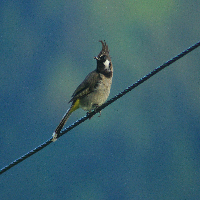

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [13]:
img = image.load_img('/kaggle/input/bird-species-classification/test_data/test_data/himbul/6154954471_eefe6e00d1_o.jpg', target_size=(200, 200))
img

In [14]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
res = model.predict(img)
index_of_res = np.argmax(res)

1/1 [==============================] - 0s 143ms/step


In [15]:
res_lookup = [
    'blasti',
    'bonegl',
    'brhkyt',
    'cbrtsh',
    'cmnmyn',
    'gretit',
    'hilpig',
    'himbul',
    'himgri',
    'hsparo',
    'indvul',
    'jglowl',
    'lbicrw',
    'mgprob',
    'rebimg',
    'wcrsrt'
]


In [16]:
res_lookup[index_of_res]

'himgri'